In [1]:
import warnings
warnings.filterwarnings("ignore")

**Import the libraries, load dataset, print shape of data, visualize the images in dataset (one sample of each plant species)**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, auc, classification_report
from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping
import cv2
from google.colab.patches import cv2_imshow

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
images = np.load("/content/drive/My Drive/Colab Notebooks/images.npy")

**Shape of images array**

In [5]:
images.shape

(4750, 128, 128, 3)

In [6]:
images[0].shape

(128, 128, 3)

**Read Labels**

In [7]:
labels = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Labels.csv")

In [8]:
np.sort (labels['Label'].unique())

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype=object)

In [9]:
x = images

In [10]:
x = images.astype('float32')

In [11]:
y = labels

In [12]:
y.head(1)

,Label
0,Small-flowered Cranesbill


In [13]:
y.tail(1)

,Label
4749,Loose Silky-bent


In [14]:
y['row_num'] = np.arange(len(y))
y.head(1)

,Label,row_num
0,Small-flowered Cranesbill,0


In [15]:
y.tail(1)

,Label,row_num
4749,Loose Silky-bent,4749


**Show original and Gaussian blurred image (one sample per species, we will handle all images, and labels and split into training, validation, and test sets later**


 Label 
 Label row_no: 0 
 Name: Small-flowered Cranesbill


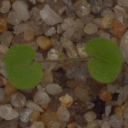


 Label 
 Label row_no: 0 
 Name: Small-flowered Cranesbill Blurred


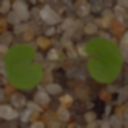

In [16]:
i = 0
image = x[i]
label = y['Label'][i]
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label))
cv2_imshow(image)
print()
image_blur = cv2.GaussianBlur(image, (5, 5), 0)
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label + ' Blurred'))
cv2_imshow(image_blur)
print()
print()

 Label 
 Label row_no: 497 
 Name: Fat Hen


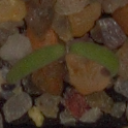


 Label 
 Label row_no: 497 
 Name: Fat Hen Blurred


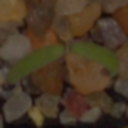

In [17]:
i = 497
image = x[i]
label = y['Label'][i]
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label))
cv2_imshow(image)
print()
image_blur = cv2.GaussianBlur(image, (5, 5), 0)
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label + ' Blurred'))
cv2_imshow(image_blur)
print()
print()

 Label 
 Label row_no: 972 
 Name: Shepherds Purse


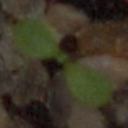


 Label 
 Label row_no: 972 
 Name: Shepherds Purse Blurred


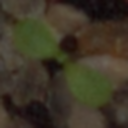

In [18]:
i = 972
image = x[i]
label = y['Label'][i]
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label))
cv2_imshow(image)
print()
image_blur = cv2.GaussianBlur(image, (5, 5), 0)
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label + ' Blurred'))
cv2_imshow(image_blur)
print()
print()

 Label 
 Label row_no: 1203 
 Name: Common wheat


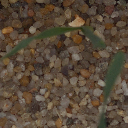


 Label 
 Label row_no: 1203 
 Name: Common wheat Blurred


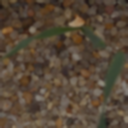

In [19]:
i = 1203
image = x[i]
label = y['Label'][i]
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label))
cv2_imshow(image)
print()
image_blur = cv2.GaussianBlur(image, (5, 5), 0)
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label + ' Blurred'))
cv2_imshow(image_blur)
print()
print()

 Label 
 Label row_no: 1424 
 Name: Common Chickweed


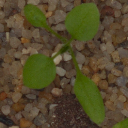


 Label 
 Label row_no: 1424 
 Name: Common Chickweed Blurred


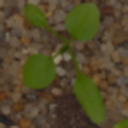

In [20]:
i = 1424
image = x[i]
label = y['Label'][i]
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label))
cv2_imshow(image)
print()
image_blur = cv2.GaussianBlur(image, (5, 5), 0)
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label + ' Blurred'))
cv2_imshow(image_blur)
print()
print()

 Label 
 Label row_no: 2035 
 Name: Charlock


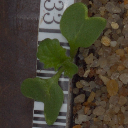


 Label 
 Label row_no: 2035 
 Name: Charlock Blurred


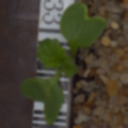

In [21]:
i = 2035
image = x[i]
label = y['Label'][i]
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label))
cv2_imshow(image)
print()
image_blur = cv2.GaussianBlur(image, (5, 5), 0)
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label + ' Blurred'))
cv2_imshow(image_blur)
print()
print()

 Label 
 Label row_no: 2425 
 Name: Cleavers


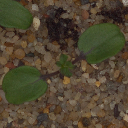


 Label 
 Label row_no: 2425 
 Name: Cleavers Blurred


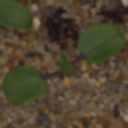

In [23]:
i = 2425
image = x[i]
label = y['Label'][i]
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label))
cv2_imshow(image)
print()
image_blur = cv2.GaussianBlur(image, (5, 5), 0)
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label + ' Blurred'))
cv2_imshow(image_blur)
print()
print()

 Label 
 Label row_no: 2712 
 Name: Scentless Mayweed


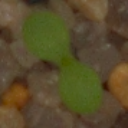


 Label 
 Label row_no: 2712 
 Name: Scentless Mayweed Blurred


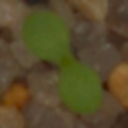

In [24]:
i = 2712
image = x[i]
label = y['Label'][i]
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label))
cv2_imshow(image)
print()
image_blur = cv2.GaussianBlur(image, (5, 5), 0)
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label + ' Blurred'))
cv2_imshow(image_blur)
print()
print()

 Label 
 Label row_no: 3228 
 Name: Sugar beet


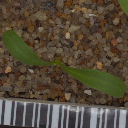


 Label 
 Label row_no: 3228 
 Name: Sugar beet Blurred


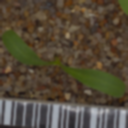

In [25]:
i = 3228
image = x[i]
label = y['Label'][i]
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label))
cv2_imshow(image)
print()
image_blur = cv2.GaussianBlur(image, (5, 5), 0)
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label + ' Blurred'))
cv2_imshow(image_blur)
print()
print()

 Label 
 Label row_no: 3613 
 Name: Maize


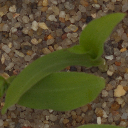


 Label 
 Label row_no: 3613 
 Name: Maize Blurred


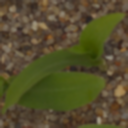

In [26]:
i = 3613
image = x[i]
label = y['Label'][i]
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label))
cv2_imshow(image)
print()
image_blur = cv2.GaussianBlur(image, (5, 5), 0)
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label + ' Blurred'))
cv2_imshow(image_blur)
print()
print()

 Label 
 Label row_no: 3834 
 Name: Black-grass


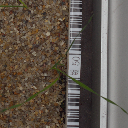


 Label 
 Label row_no: 3834 
 Name: Black-grass Blurred


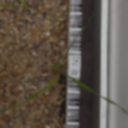

In [27]:
i = 3834
image = x[i]
label = y['Label'][i]
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label))
cv2_imshow(image)
print()
image_blur = cv2.GaussianBlur(image, (5, 5), 0)
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label + ' Blurred'))
cv2_imshow(image_blur)
print()
print()

 Label 
 Label row_no: 4097 
 Name: Loose Silky-bent


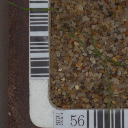


 Label 
 Label row_no: 4097 
 Name: Loose Silky-bent Blurred


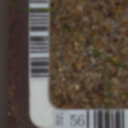

In [28]:
i = 4097
image = x[i]
label = y['Label'][i]
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label))
cv2_imshow(image)
print()
image_blur = cv2.GaussianBlur(image, (5, 5), 0)
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label + ' Blurred'))
cv2_imshow(image_blur)
print()
print()

 Label 
 Label row_no: 0 
 Name: Small-flowered Cranesbill


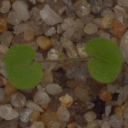


 Label 
 Label row_no: 0 
 Name: Small-flowered Cranesbill Blurred


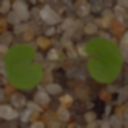


 Label 
 Label row_no: 0 
 Name: Small-flowered Cranesbill Blurred and then Sobel filter


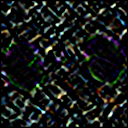

In [29]:
i = 0
image = x[i]
label = y['Label'][i]
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label))
cv2_imshow(image)
print()
image_blur = cv2.GaussianBlur(image, (5, 5), 0)
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label + ' Blurred'))
cv2_imshow(image_blur)
print()
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label + ' Blurred and then Sobel filter'))
sobel = cv2.Sobel(image_blur, cv2.CV_64F, 1, 1, ksize=5)
cv2_imshow(sobel)
print()
print()

**Data preprocessing
a. Normalization. 
b. Gaussian Blurring. 
c. Visualize data after pre-processing**


In [30]:
x = images
x = x.astype('float32') # Conversion to float type from integer type.
x /= 255.0 # Division by 255

In [31]:
x[0]

array([[[0.13725491, 0.20392157, 0.30588236],
        [0.14117648, 0.19215687, 0.29803923],
        [0.12156863, 0.1764706 , 0.27058825],
        ...,
        [0.30588236, 0.37254903, 0.44705883],
        [0.29803923, 0.3647059 , 0.43137255],
        [0.3137255 , 0.37254903, 0.42745098]],

       [[0.12941177, 0.18039216, 0.26666668],
        [0.14509805, 0.19607843, 0.28627452],
        [0.1882353 , 0.25490198, 0.3254902 ],
        ...,
        [0.31764707, 0.3764706 , 0.44313726],
        [0.2901961 , 0.34901962, 0.4117647 ],
        [0.3254902 , 0.37254903, 0.42745098]],

       [[0.13333334, 0.19607843, 0.26666668],
        [0.13725491, 0.20392157, 0.28235295],
        [0.27450982, 0.33333334, 0.39607844],
        ...,
        [0.3254902 , 0.38039216, 0.4392157 ],
        [0.30980393, 0.36862746, 0.42352942],
        [0.30980393, 0.36862746, 0.41960785]],

       ...,

       [[0.13725491, 0.19607843, 0.27058825],
        [0.16470589, 0.22352941, 0.28627452],
        [0.16470589, 0

In [32]:
y_target = y.drop(labels='Label',axis=1,inplace=False)

In [33]:
y_target = y_target.astype('uint8')

In [34]:
batch_size = 32
num_classes = 12
epochs = 30
num_predictions = 24

**Split the dataset into training, testing, and validation set.
(First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)**

In [35]:
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# train is now 70% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(x, y_target, test_size = 1-train_ratio)

# test is now 15% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

**Check the shape of data**

In [37]:
print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)


(3324, 128, 128, 3) (713, 128, 128, 3) (713, 128, 128, 3)
(3324, 1) (713, 1) (713, 1)


In [38]:
y_train.dtypes

row_num    uint8
dtype: object

**Convert labels to one-hot-vectors**

In [39]:
#Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes=None, dtype='uint8')
y_val = keras.utils.to_categorical(y_val, num_classes=None, dtype='uint8')
y_test = keras.utils.to_categorical(y_test, num_classes=None, dtype='uint8')

**Building CNN: 
a. Define layers.
b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)**

In [42]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 128)     3584      
_________________________________________________________________
activation (Activation)      (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 128)     147584    
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 256)       2

In [43]:
opt = keras.optimizers.Adam(learning_rate=0.0001)

In [44]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [45]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

**Fit and evaluate model**

In [46]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_val, y_val),
          shuffle=True,
          verbose=1,
          callbacks=[early_stopping,model_checkpoint])

Epoch 1/30
104/104 [==============================] - ETA: 0s - loss: 5.5500 - accuracy: 0.0030
Epoch 00001: val_loss improved from inf to 5.54544, saving model to cifar_cnn_checkpoint_01_loss5.5454.h5
104/104 [==============================] - 22s 214ms/step - loss: 5.5500 - accuracy: 0.0030 - val_loss: 5.5454 - val_accuracy: 0.0000e+00
Epoch 2/30
104/104 [==============================] - ETA: 0s - loss: 5.5451 - accuracy: 0.0030
Epoch 00002: val_loss did not improve from 5.54544
104/104 [==============================] - 19s 181ms/step - loss: 5.5451 - accuracy: 0.0030 - val_loss: 5.5467 - val_accuracy: 0.0014
Epoch 3/30
104/104 [==============================] - ETA: 0s - loss: 5.5458 - accuracy: 0.0054
Epoch 00003: val_loss did not improve from 5.54544
104/104 [==============================] - 19s 184ms/step - loss: 5.5458 - accuracy: 0.0054 - val_loss: 5.5464 - val_accuracy: 0.0042
Epoch 4/30
104/104 [==============================] - ETA: 0s - loss: 5.5432 - accuracy: 0.0045
Ep

**Evaluate the model on test data**

In [47]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 1s 49ms/step - loss: 10.7852 - accuracy: 0.0014
Test loss: 10.785199165344238
Test accuracy: 0.001402524532750249


**Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]**

 Label 
 Label row_no: 2 
 Name: Small-flowered Cranesbill


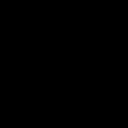

In [48]:
i = 2
image = x_test[i]
row_no = y_test[i]
label = y['Label'][2]
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label))
cv2_imshow(image)
print()

 Label 
 Label row_no: 59 
 Name: Small-flowered Cranesbill


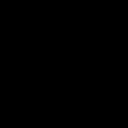

In [49]:
i = 59
image = x_test[i]
label = y['Label'][i]
print(' Label \n Label row_no: {} \n Name: {}'.format(i, label))
cv2_imshow(image)
print()